<h1>Лабораторная работа №2.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

## 1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,σ²)

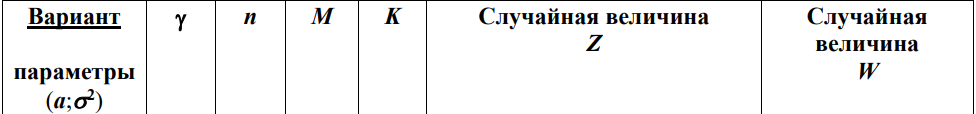

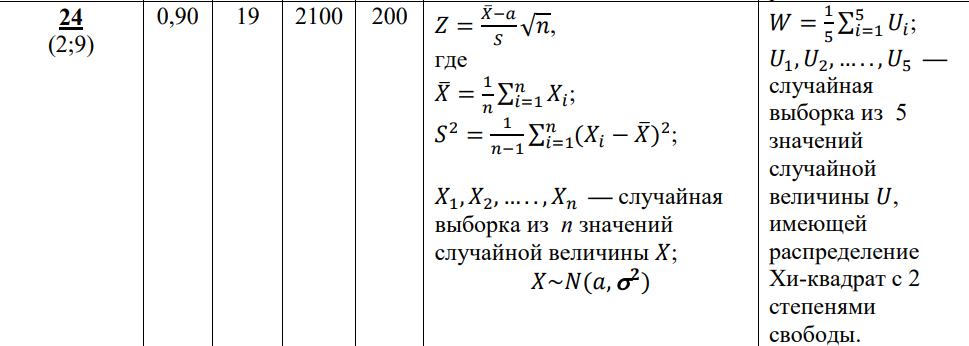

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st
import scipy.stats as sts
import math

In [31]:
### задаем параметры нормального распредеелния
n=19
a=2
Sigma=np.sqrt(9)
#########################################
gamma=0.90 ### доверительная вероятность

In [ ]:
#### генерируем выборку из нормально распределенной СВ X
X= np.random.normal(a, Sigma, n)
print(X)

[ 2.80743358  0.20843612  1.37709401  6.21845484 -0.41328313  3.34945742
  4.51695072 -1.12067295  7.77150839  6.55330921 -0.45759034  4.98641765
 -0.78215846  1.57925953  7.60795387  0.90521357 -0.59908685  4.62193462
  9.31004254]


### 1.1. С надежностью ɣ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна (см. УКАЗАНИЕ).

#### УКАЗАНИЕ. В пунктах 1.1. и 1.2. Части I интервальные оценки найти двумя способами. Первый способ заключается в программной реализации формул для вычисления границ интервальной оценки, а второй — в использовании метода interval из модуля статистических функций scipy.stats

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t\sigma}{\sqrt{n}}$$
$$
t=\Phi^{-1}(\frac{\gamma}{2}) $$

In [33]:
# Вычисляем границы доверительного интервала вручную
P_=1/2+gamma/2
t = st.norm.ppf(P_, loc=0, scale=1) 
delta = t * Sigma / np.sqrt(n)
x_mean = np.mean(X)

a_left = x_mean - delta
a_right = x_mean + delta

print(f"Доверительный интервал для математического ожидания (известная дисперсия): [{a_left:.4f}, {a_right:.4f}]")

Доверительный интервал для математического ожидания (известная дисперсия): [1.9438, 4.2079]


In [ ]:
# Используем встроенные функции для расчета доверительного интервала
interval_estimate_1 = st.norm.interval(confidence = gamma, loc = x_mean, scale = Sigma/np.sqrt(n))

print(f"Доверительный интервал (известная дисперсия, метод interval): [{interval_estimate_1[0]:.4f}, {interval_estimate_1[1]:.4f}]")

Доверительный интервал (известная дисперсия, метод interval): [1.9438, 4.2079]


### 1.2. С надежностью ɣ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t_\gamma*S}{\sqrt{n}}$$
$$
t_\gamma=t(\gamma; n) $$

In [42]:
# Вычисляем границы доверительного интервала вручную при неизвестной дисперсии
S = np.std(X, ddof=1)  # несмещенная оценка стандартного отклонения
t_gamma = st.t.ppf(P_, df = n - 1)  # критическое значение распределения Стьюдента.
delta_= t_gamma * (S / np.sqrt(n))

a_left_ = x_mean - delta_
a_right_ = x_mean + delta_

print(f"Доверительный интервал для математического ожидания (неизвестная дисперсия): [{a_left_:.4f}, {a_right_:.4f}]")

Доверительный интервал для математического ожидания (неизвестная дисперсия): [1.7484, 4.4032]


In [43]:
# Используем встроенные функции для расчета доверительного интервала
interval_estimate_2 = st.t.interval(confidence = gamma, df = n-1, loc = x_mean, scale = S/np.sqrt(n))

print(f"Доверительный интервал (неизвестная дисперсия, метод interval): [{interval_estimate_2[0]:.4f}, {interval_estimate_2[1]:.4f}]")

Доверительный интервал (неизвестная дисперсия, метод interval): [1.7484, 4.4032]


### 1.3. С надежностью ɣ найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X. 

$$
\left( \frac{(n - 1) S^2}{Y_{прав}}<\sigma^2<\frac{(n - 1) S^2}{Y_{лев}} \right)
$$
$$Y_{прав}=\chi^2_{\frac{1+\gamma}{2}, n-1}$$
$$Y_{лев}=\chi^2_{\frac{1-\gamma}{2}, n-1}$$

In [51]:
# Доверительный интервал для дисперсии
right = (1+gamma)/2
left = (1-gamma)/2

Y_right = st.chi2.ppf(right, df=n-1)
Y_left = st.chi2.ppf(left, df=n-1)

S_2 = S * S

right_bound = (n - 1) * S_2 / Y_right
left_bound = (n - 1) * S_2 / Y_left

print(f"Доверительный интервал для дисперсии:: [{right_bound:.4f}, {left_bound:.4f}]")

Доверительный интервал для дисперсии:: [6.9418, 21.3415]


## 2. Построить график зависимости длины доверительного интервала от надежности при неизменном объеме выборки для случаев интервального оценивания математического ожидания и дисперсии.


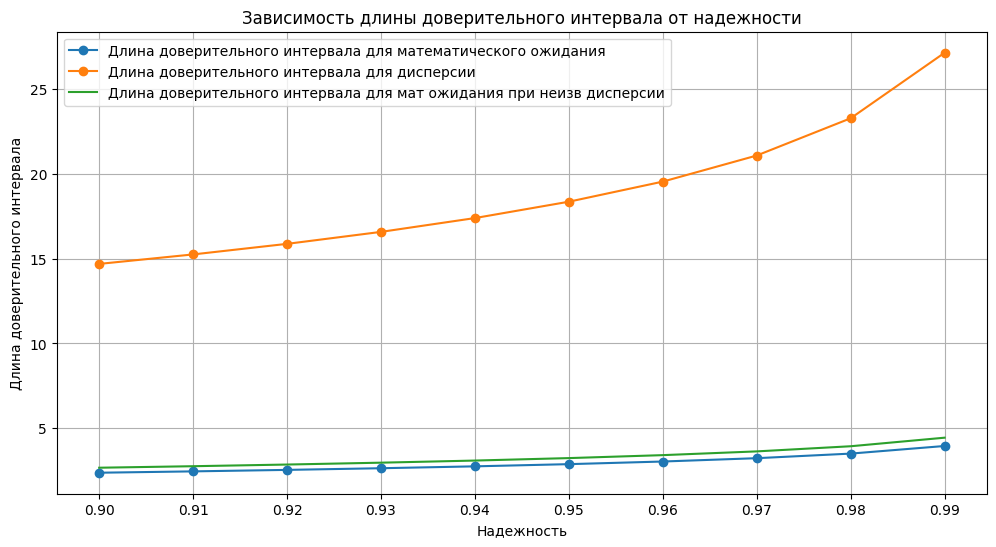

In [ ]:

confidence_levels = np.linspace(0.90, 0.99, 10)  # от 90% до 99%

# Длины доверительных интервалов
len_mean = []
len_mean_mat=[]
len_var = []

for confidence in confidence_levels:
    # 1. Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, n-1) 
    len_interval = t_value * (Sigma / np.sqrt(n)) 
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    x_mean = np.mean(X)
    S = np.std(X, ddof=1)  # несмещенная оценка стандартного отклонения
    S_2=S*S
    t_gamma = st.t.ppf(1 - (1 - confidence) / 2, df = n - 1)  # t-критерий

    a_left_unknown = x_mean - t_gamma * (S / np.sqrt(n))
    a_right_unknown = x_mean + t_gamma * (S / np.sqrt(n))
    len_mean_mat.append(a_right_unknown - a_left_unknown)

    # 2. Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2, n-1)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2, n-1)
    length_variance = (n-1) * S_2 / chi2_lower - (n-1) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(confidence_levels, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.plot(confidence_levels, len_mean_mat,label='Длина доверительного интервала для мат ожидания при неизв дисперсии')
plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(confidence_levels)
plt.show()


In [ ]:
# Генерация выборки
sample = np.random.normal(a, Sigma, n)
sample_mean = np.mean(sample)

# Параметры для доверительных интервалов
V = 500  # количество уровней надежности
gamma_ = [0.0] * V  # массив надежности
delta_ = [0.0] * V  # массив длин доверительных интервалов

gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V

# Длины доверительных интервалов
len_a_sigma_known = []  # для известной дисперсии
len_a_sigma_unknown = []  # для неизвестной дисперсии
len_sigma = []  # для дисперсии

# 1. Доверительный интервал для математического ожидания при известной дисперсии
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    interval_estimate_MX = st.norm.interval(alpha=gamma_[i],
                                            loc=sample_mean,  # используем выборочное среднее
                                            scale=Sigma / np.sqrt(n))  # известное стандартное отклонение
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0]
    len_a_sigma_known.append(delta_[i])

    # 2. Доверительный интервал для математического ожидания при неизвестной дисперсии
    S = np.std(sample, ddof=1)  # несмещенная оценка стандартного отклонения
    t_value = st.t.ppf(1 - gamma_[i] / 2, df=n-1)  # t-критерий
    interval_estimate_MX_unknown = (sample_mean - t_value * (S / np.sqrt(n)),
                                    sample_mean + t_value * (S / np.sqrt(n)))
    len_a_sigma_unknown.append(interval_estimate_MX_unknown[1] - interval_estimate_MX_unknown[0])

    # 3. Доверительный интервал для дисперсии
    chi2_lower = st.chi2.ppf(1 - gamma_[i] / 2, df=n-1)
    chi2_upper = st.chi2.ppf(gamma_[i] / 2, df=n-1)
    S2 = np.var(sample, ddof=1)  # несмещенная оценка дисперсии
    lower_bound = (n - 1) * S2 / chi2_upper
    upper_bound = (n - 1) * S2 / chi2_lower
    len_sigma.append(upper_bound - lower_bound)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(gamma_, len_a_sigma_known, marker='o', label='Длина доверительного интервала для MX (известная дисперсия)')
plt.plot(gamma_, len_a_sigma_unknown, marker='s', label='Длина доверительного интервала для MX (неизвестная дисперсия)')
plt.plot(gamma_, len_sigma, marker='^', label='Длина доверительного интервала для дисперсии')

plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(np.linspace(0.7, 1, 7))
plt.show()

TypeError: rv_generic.interval() missing 1 required positional argument: 'confidence'

## 3. Построить график зависимости длины доверительного интервала от объема выборки при неизменной надежности для случаев интервального оценивания математического ожидания и дисперсии.

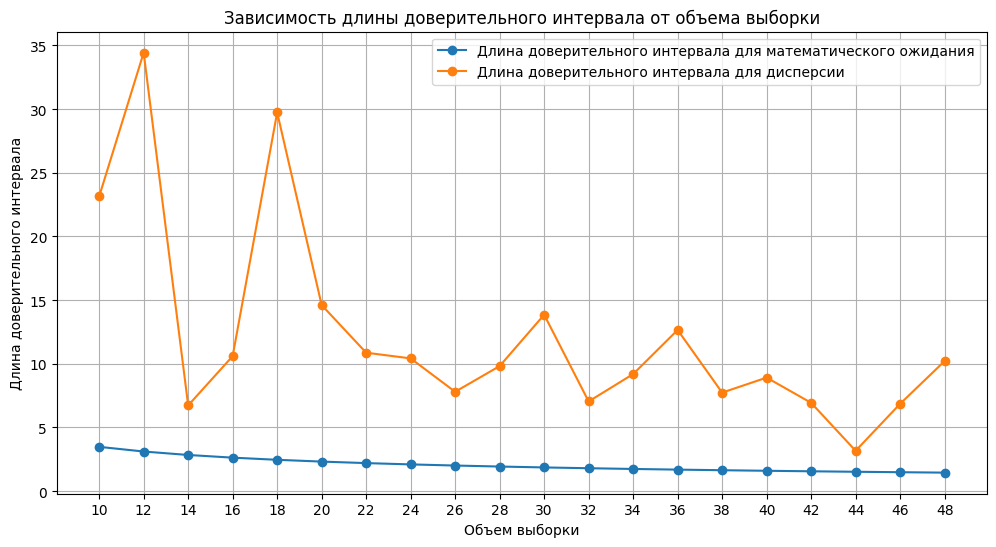

In [11]:

sample_size = list(range(10, 50, 2))
confidence=0.90
# Длины доверительных интервалов
len_mean = []
len_var = []

for size in sample_size:
    N=sts.norm.rvs(loc=a ,scale=Sigma, size=size)
    x_mean = np.mean(N)
    S_2 = np.var(N, ddof=1)# Выборочная дисперсия
    
    # Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, size - 1) 
    len_interval = t_value * (Sigma / np.sqrt(size)) 
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    #  Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf( alpha / 2,  size - 1)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2,  size - 1)
    length_variance = ( size - 1) * S_2 / chi2_lower - (size - 1) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(sample_size, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(sample_size, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.xlabel('Объем выборки')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(sample_size)
plt.show()

## 4. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ²). По каждой из M выборок с надежностью ɣ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна. По результатам моделирования найти точечную оценку ɣ* надежности ɣ.

In [12]:
M=2100
count_gamma=0 # счетчик для гамма, попавших в интервал
for i in range(M):
    sample = sts.norm.rvs(loc=a, scale=Sigma, size=n)
    sample_mean = np.mean(sample)
    sample_s_2 = np.var(sample, ddof=1) # Выборочная дисперсия
    t_value = sts.t.ppf(1 - alpha / 2, n-1)
    margin = t_value * np.sqrt(sample_s_2 / n)
    
    # Доверительный интервал
    ci_lower = sample_mean - margin
    ci_upper = sample_mean + margin
    
    # Проверка попадания истинного значения в интервал
    if ci_lower <= a <= ci_upper:
        count_gamma += 1

# Точечная оценка надежности γ*
gamma = count_gamma / M
print(f"Точечная оценка надежности γ*: {gamma}")
    

Точечная оценка надежности γ*: 0.8961904761904762


## 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ²). 

In [13]:
M = 2100
n = 19

# Массив для хранения выборок
samples = np.zeros((M, n))

# Генерация выборок
for i in range(M):
    samples[i] = sts.norm.rvs(loc=a, scale=Sigma, size=n)

### 5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z


$Z = \frac{\bar{X} - a}{S} \cdot \sqrt{n}$

In [14]:
# Список для хранения наблюдаемых значений Z
z_arr = []

for sample in samples:
    # Выборочное среднее
    x_m = np.mean(sample)
    
    # Выборочное стандартное отклонение
    s = np.std(sample, ddof=1)
    
    # Наблюдаемое значение Z
    z = np.sqrt(n) * (x_m - a) / s
    z_arr.append(z)

### 5.2. По выборке из M значений случайной величины Z найти выборочные числовые характеристики ее распределения.

In [15]:
z_mean=np.mean(z_arr)
z_var=np.var(z_arr)
z_median = np.median(z_arr)
std= np.std(z_arr) 
skewness = sts.skew(z_arr)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(z_arr)

# Вывод результатов
print(f'Математическое ожидание: {z_mean:.5f}')
print(f'Медиана: {z_median:.5f}')
print(f'Дисперсия: {z_var:.3f}')
print(f'Стандартное отклонение: {std:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -0.03467
Медиана: -0.02850
Дисперсия: 1.140
Стандартное отклонение: 1.06762
Коэффициент ассиметрии: -0.05073
Эксцесс: 0.41164


### 5.3. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Z, а также ящичковую диаграмму.


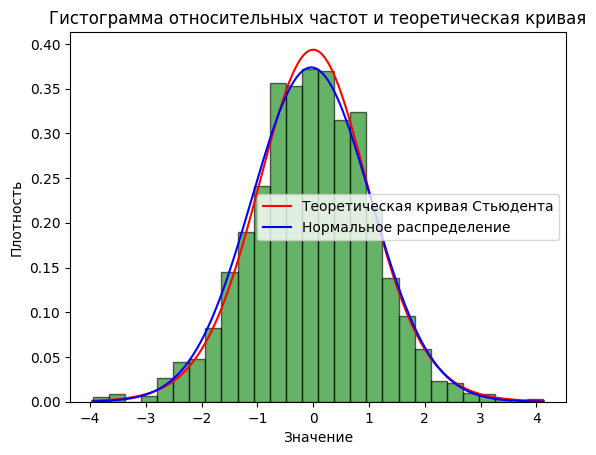

In [16]:
std_z = np.std(z_arr)
plt.hist(z_arr, bins="scott", density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(z_arr), np.max(z_arr), M)
pdf_t = sts.t.pdf(x, n - 1)
plt.plot(x, pdf_t, 'r', label="Теоретическая кривая Стьюдента")

# Нормальное распределение
y = np.linspace(np.min(z_arr), np.max(z_arr), M)
pdf_norm = sts.norm.pdf(y, np.mean(z_arr), np.std(z_arr))
plt.plot(x, pdf_norm, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()


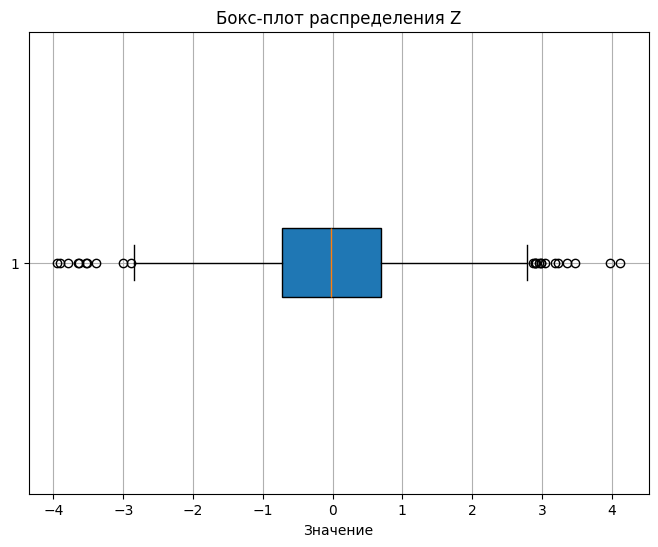

Фактическое количество выбросов: 24


In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(z_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

# интерквартильный размах
q1 = np.percentile(z_arr, 25)
q3 = np.percentile(z_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Считаем выбросы
outliers = [z for z in z_arr if z < lower_bound or z > upper_bound]
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")

### 5.4. Каков закон распределения случайной величины Z? 

нормальное